<a href="https://colab.research.google.com/github/poddardelhi/crm_homeTask/blob/main/HomeTask_CRMAnalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('crm-analyst-home-task')
jovian.set_colab_id('19qlyMoLkYQQTuyeGOT8H77D-46PRtm_K')

# Commit the work

In [61]:
#Save the work to JOVIAN.ML
project_name = "crm-analyst-home-task"
 # change this
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/poddardelhi/crm-analyst-home-task


'https://jovian.ai/poddardelhi/crm-analyst-home-task'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Task 1



1. Calculate the following rates, based on data from the page "1. Data" (in the data sheet there are columns currently empty - fill them):
  
  1.1. Funnel Start Rate (Rate at which Sessions become Started Applications).
  
  1.2. Approval Rate (Rate at which Finished Applications become Approved Applications)
  
  1.3. Write Rate (Rate at which Approved Applications become Paid Applications)






In [12]:
df_application= pd.read_csv("/content/drive/MyDrive/Jovian/Ferratum_CRM/data_q1.csv")

In [13]:
df_application.head()

,Country,Date,Date_HR,Sessions,StartedApplications,FinishedApps,Approved,PaidOut
0,Australia,43466,01/01/2019,91127.0,28144.0,10587,523.0,510.0
1,Australia,43497,01/02/2019,77586.0,24290.0,9054,546.0,537.0
2,Australia,43525,01/03/2019,65420.0,18904.0,7614,446.0,439.0
3,Brazil,43466,01/01/2019,232295.0,143099.0,14264,1229.0,678.0
4,Brazil,43497,01/02/2019,168190.0,99253.0,14090,755.0,321.0


In [14]:
df_application.shape

(66, 8)

In [15]:
#checking the Null or Nan values
df_application.isna().sum()

Country                0
Date                   0
Date_HR                0
Sessions               3
StartedApplications    3
FinishedApps           0
Approved               2
PaidOut                2
dtype: int64

In [16]:
# Finding the individual rows that are Null/NaN type
none_values=df_application[df_application.isna().any(axis=1)][::]
none_values.head()


,Country,Date,Date_HR,Sessions,StartedApplications,FinishedApps,Approved,PaidOut
39,Nigeria,43466,01/01/2019,NaN,NaN,92940,6.0,4.0
40,Nigeria,43497,01/02/2019,NaN,NaN,70493,4.0,1.0
41,Nigeria,43525,01/03/2019,NaN,NaN,60915,5.0,2.0
52,Russia,43497,01/02/2019,38605.0,13951.0,6228,NaN,NaN
53,Russia,43525,01/03/2019,16772.0,389.0,0,NaN,NaN


## Empty columns?
We have many empty columns for countries Nigeria and Russia. I'm taking a assumption here that every time a user logs in, it is recorded as 1 session. Therefore, I'm disregarding Nigeria during analysis and value 0 is replaced for all empty cells.

In case of Russia, all NaN cells are replaced with value 0


In [17]:
df_application.fillna(value=0, axis=1, inplace=True)
df_application.isna().sum()

Country                0
Date                   0
Date_HR                0
Sessions               0
StartedApplications    0
FinishedApps           0
Approved               0
PaidOut                0
dtype: int64

In [18]:
# Dropping the excel serial date column 
df_application.drop(labels='Date', axis=1,inplace=True)
df_application.head()

,Country,Date_HR,Sessions,StartedApplications,FinishedApps,Approved,PaidOut
0,Australia,01/01/2019,91127.0,28144.0,10587,523.0,510.0
1,Australia,01/02/2019,77586.0,24290.0,9054,546.0,537.0
2,Australia,01/03/2019,65420.0,18904.0,7614,446.0,439.0
3,Brazil,01/01/2019,232295.0,143099.0,14264,1229.0,678.0
4,Brazil,01/02/2019,168190.0,99253.0,14090,755.0,321.0


In [37]:
df_application.rename(columns={'Date_HR':'Date'},inplace=True)
df_application['Date'] = pd.to_datetime(df_application.Date, format='%d/%m/%Y')
df_application['Date']=df_application['Date'].dt.strftime('%d/%m/%Y')
df_application['Date'] = pd.to_datetime(df_application['Date'])
df_application['Month']= pd.DatetimeIndex(df_application['Date']).month

In [38]:
# renaming the month integer values (1,2,3) to string values 
df_application['Month']= df_application['Month'].replace({1:"January", 2:"February",3:"March"})
df_application.head()

,Country,Date,Sessions,StartedApplications,FinishedApps,Approved,PaidOut,Month
0,Australia,2019-01-01,91127.0,28144.0,10587,523.0,510.0,January
1,Australia,2019-02-01,77586.0,24290.0,9054,546.0,537.0,February
2,Australia,2019-03-01,65420.0,18904.0,7614,446.0,439.0,March
3,Brazil,2019-01-01,232295.0,143099.0,14264,1229.0,678.0,January
4,Brazil,2019-02-01,168190.0,99253.0,14090,755.0,321.0,February


# Calculate the following rates, based on data from the page 

In [39]:
#Funnel Start Rate
df_application['FunnelStartRate']= (df_application['StartedApplications']/ df_application['Sessions']) * 100
#Conversion rate
df_application['ConversionRate']= (df_application['FinishedApps']/ df_application['StartedApplications']) * 100
#Approval rate
df_application['ApprovalRate']= (df_application['Approved']/df_application['FinishedApps']) *100

# Write Rate
df_application['WriteRate']= (df_application['PaidOut']/ df_application['Approved']) *100
#Displaying the above calculated values
df_application.loc[:5,['Country','Date','FunnelStartRate','ConversionRate','ApprovalRate', 'WriteRate']]


,Country,Date,FunnelStartRate,ConversionRate,ApprovalRate,WriteRate
0,Australia,2019-01-01,30.884370,37.617254,4.940021,97.514340
1,Australia,2019-02-01,31.307195,37.274599,6.030484,98.351648
2,Australia,2019-03-01,28.896362,40.277190,5.857631,98.430493
3,Brazil,2019-01-01,61.602273,9.967924,8.616096,55.166802
4,Brazil,2019-02-01,59.012426,14.196044,5.358410,42.516556
5,Brazil,2019-03-01,47.402617,24.424740,4.333376,59.292035


#Creating the pivot visualization of all the rates in Q1 months

In [40]:
pivot_df_month_SR= df_application.pivot_table(index='Country', columns='Month', values='FunnelStartRate',dropna=True)
pivot_df_month_CR=df_application.pivot_table(index='Country', columns='Month', values='ConversionRate',dropna=True)
pivot_df_month_AR= df_application.pivot_table(index='Country', columns='Month', values='ApprovalRate', dropna=True)
pivot_df_month_WR= df_application.pivot_table(index='Country', columns='Month', values='WriteRate', dropna=True)


In [41]:
pivot_df_month_SR

Month,February,January,March
Country,,,
Australia,31.307195,30.884370,28.896362
Brazil,59.012426,61.602273,47.402617
Bulgaria,22.737165,22.973928,24.387118
Canada,26.395182,36.232423,36.622216
Croatia,18.990106,18.948019,21.451745
Czech Republic,8.205601,8.142557,7.512537
Denmark,8.815102,13.532161,25.210625
Estonia,10.324080,10.503194,9.842666
Finland,11.793417,11.304145,11.874489


/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


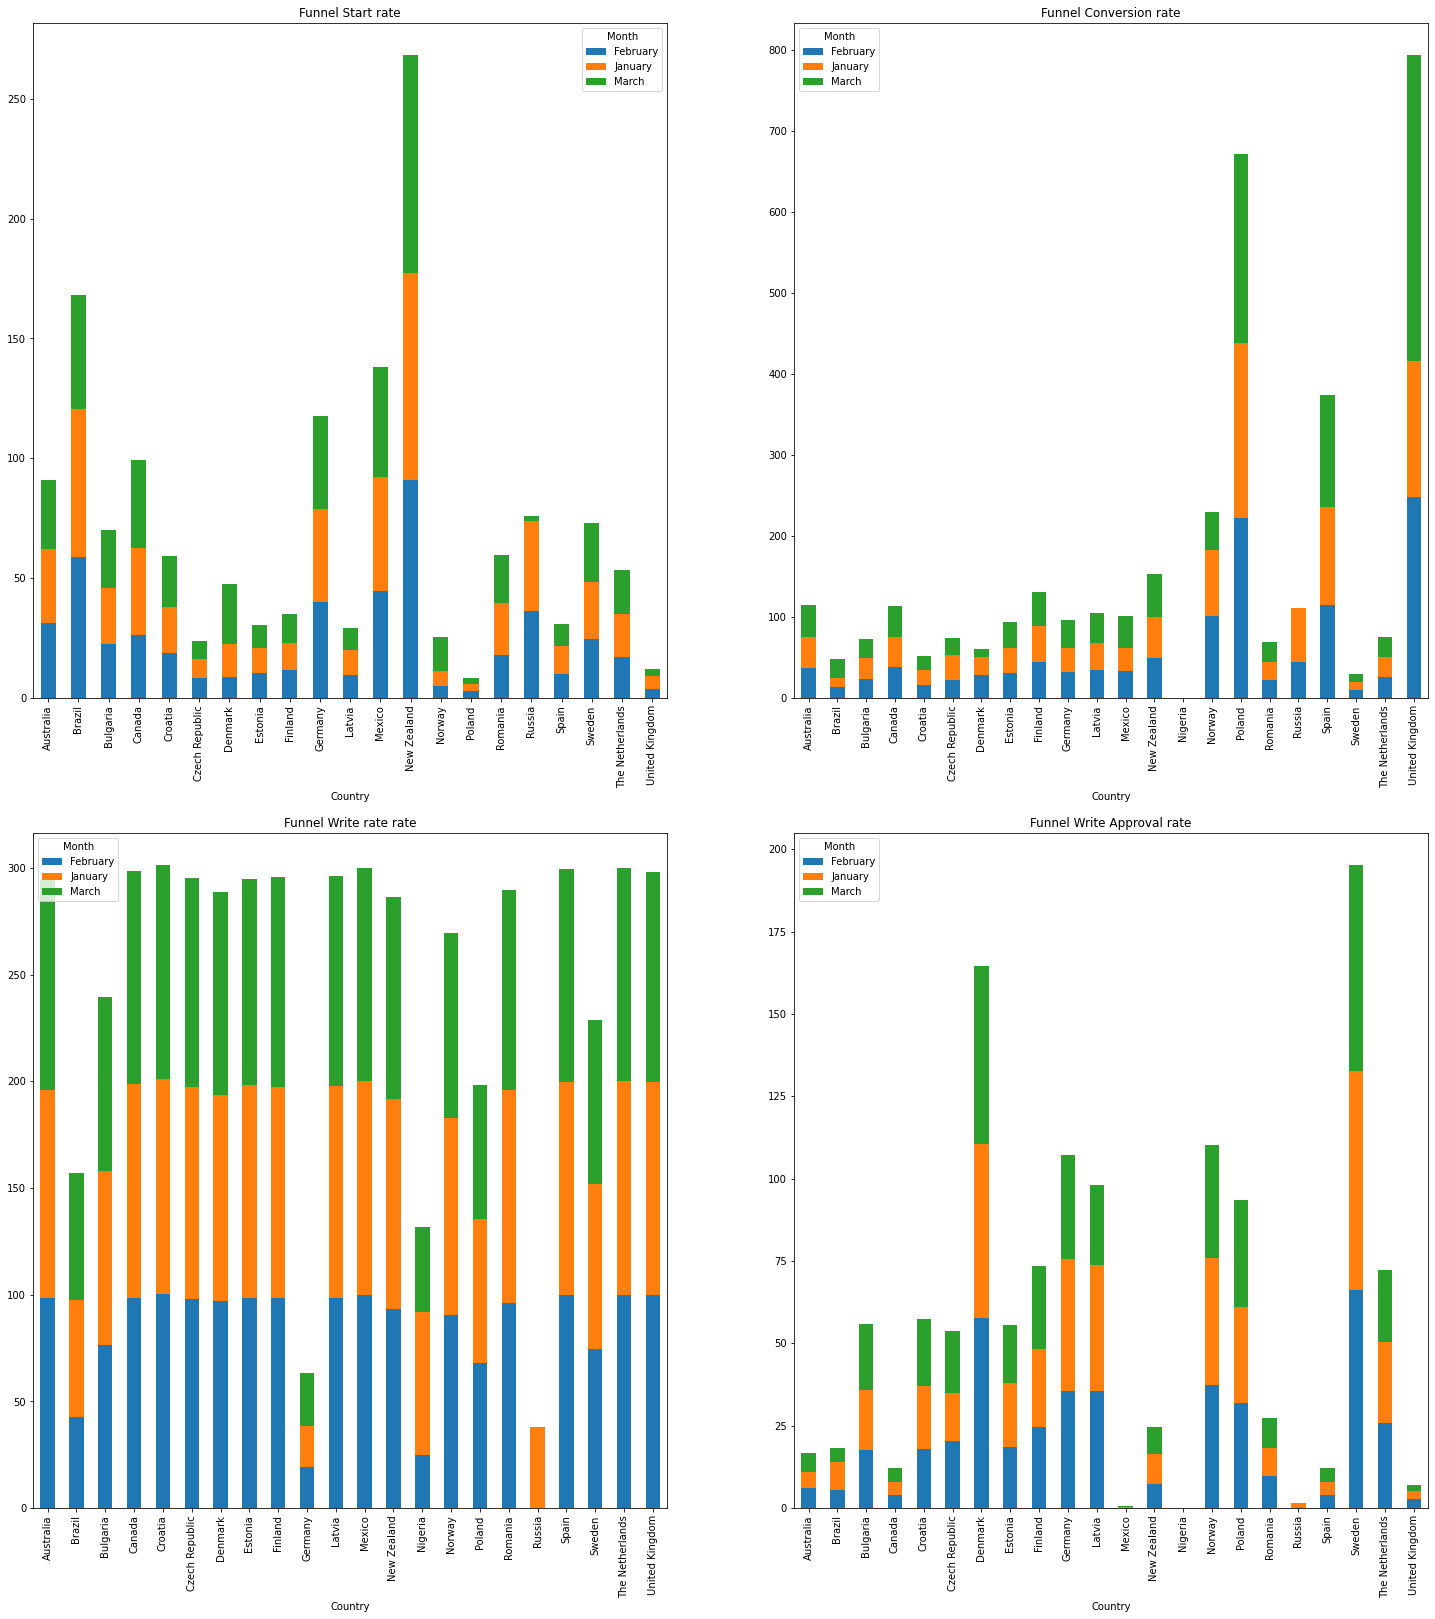

In [ ]:
#pivot_df_month_SR.loc[:,['February', 'January','March']].plot.bar( stacked= True, color=colors,figsize(10,7))

fig,([ax1,ax2],[ax3,ax4])= plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(25)

ax1.set_title('Funnel Start rate')
pivot_df_month_SR.plot(kind='bar',stacked=True,ax=ax1);
ax2.set_title('Funnel Conversion rate')
pivot_df_month_CR.plot(kind='bar',stacked=True,ax=ax2);
ax3.set_title('Funnel Write rate rate')

pivot_df_month_WR.plot(kind='bar',stacked=True,ax=ax3);
ax4.set_title('Funnel Write Approval rate')

pivot_df_month_AR.plot(kind='bar',stacked=True,ax=ax4);

plt.subplots_adjust(top=1.5)
plt.show()


# Create a visualization to see Group (all countries aggregated) trend over Q1 for those rates, and \# of Paid Out Loans.

In [45]:
df_application_agg=df_application.copy()
df_application_agg.drop(columns=['FunnelStartRate','ConversionRate','ApprovalRate','WriteRate','Month', 'Date'],  inplace=True)
df_application_agg=df_application_agg.groupby(['Country']).sum().reset_index()

df_application_agg['FunnelStartRate']= (df_application_agg['StartedApplications']/ df_application_agg['Sessions']) * 100
#Conversion rate
df_application_agg['ConversionRate']= (df_application_agg['FinishedApps']/ df_application_agg['StartedApplications']) * 100
#Approval rate
df_application_agg['ApprovalRate']= (df_application_agg['Approved']/df_application_agg['FinishedApps']) *100

# Write Rate
df_application_agg['WriteRate']= (df_application_agg['PaidOut']/ df_application_agg['Approved']) *100
#Displaying the above calculated values
df_application_agg.head()

,Country,Sessions,StartedApplications,FinishedApps,Approved,PaidOut,FunnelStartRate,ConversionRate,ApprovalRate,WriteRate
0,Australia,234133.0,71338.0,27255,1515.0,1486.0,30.469007,38.205445,5.558613,98.085809
1,Brazil,468053.0,274381.0,36177,2323.0,1200.0,58.621780,13.184951,6.421207,51.657340
2,Bulgaria,238303.0,55402.0,13490,2500.0,1996.0,23.248553,24.349301,18.532246,79.840000
3,Canada,47676.0,15614.0,5932,240.0,239.0,32.750231,37.991546,4.045853,99.583333
4,Croatia,210653.0,41228.0,7068,1346.0,1352.0,19.571523,17.143689,19.043577,100.445765


# visualization 

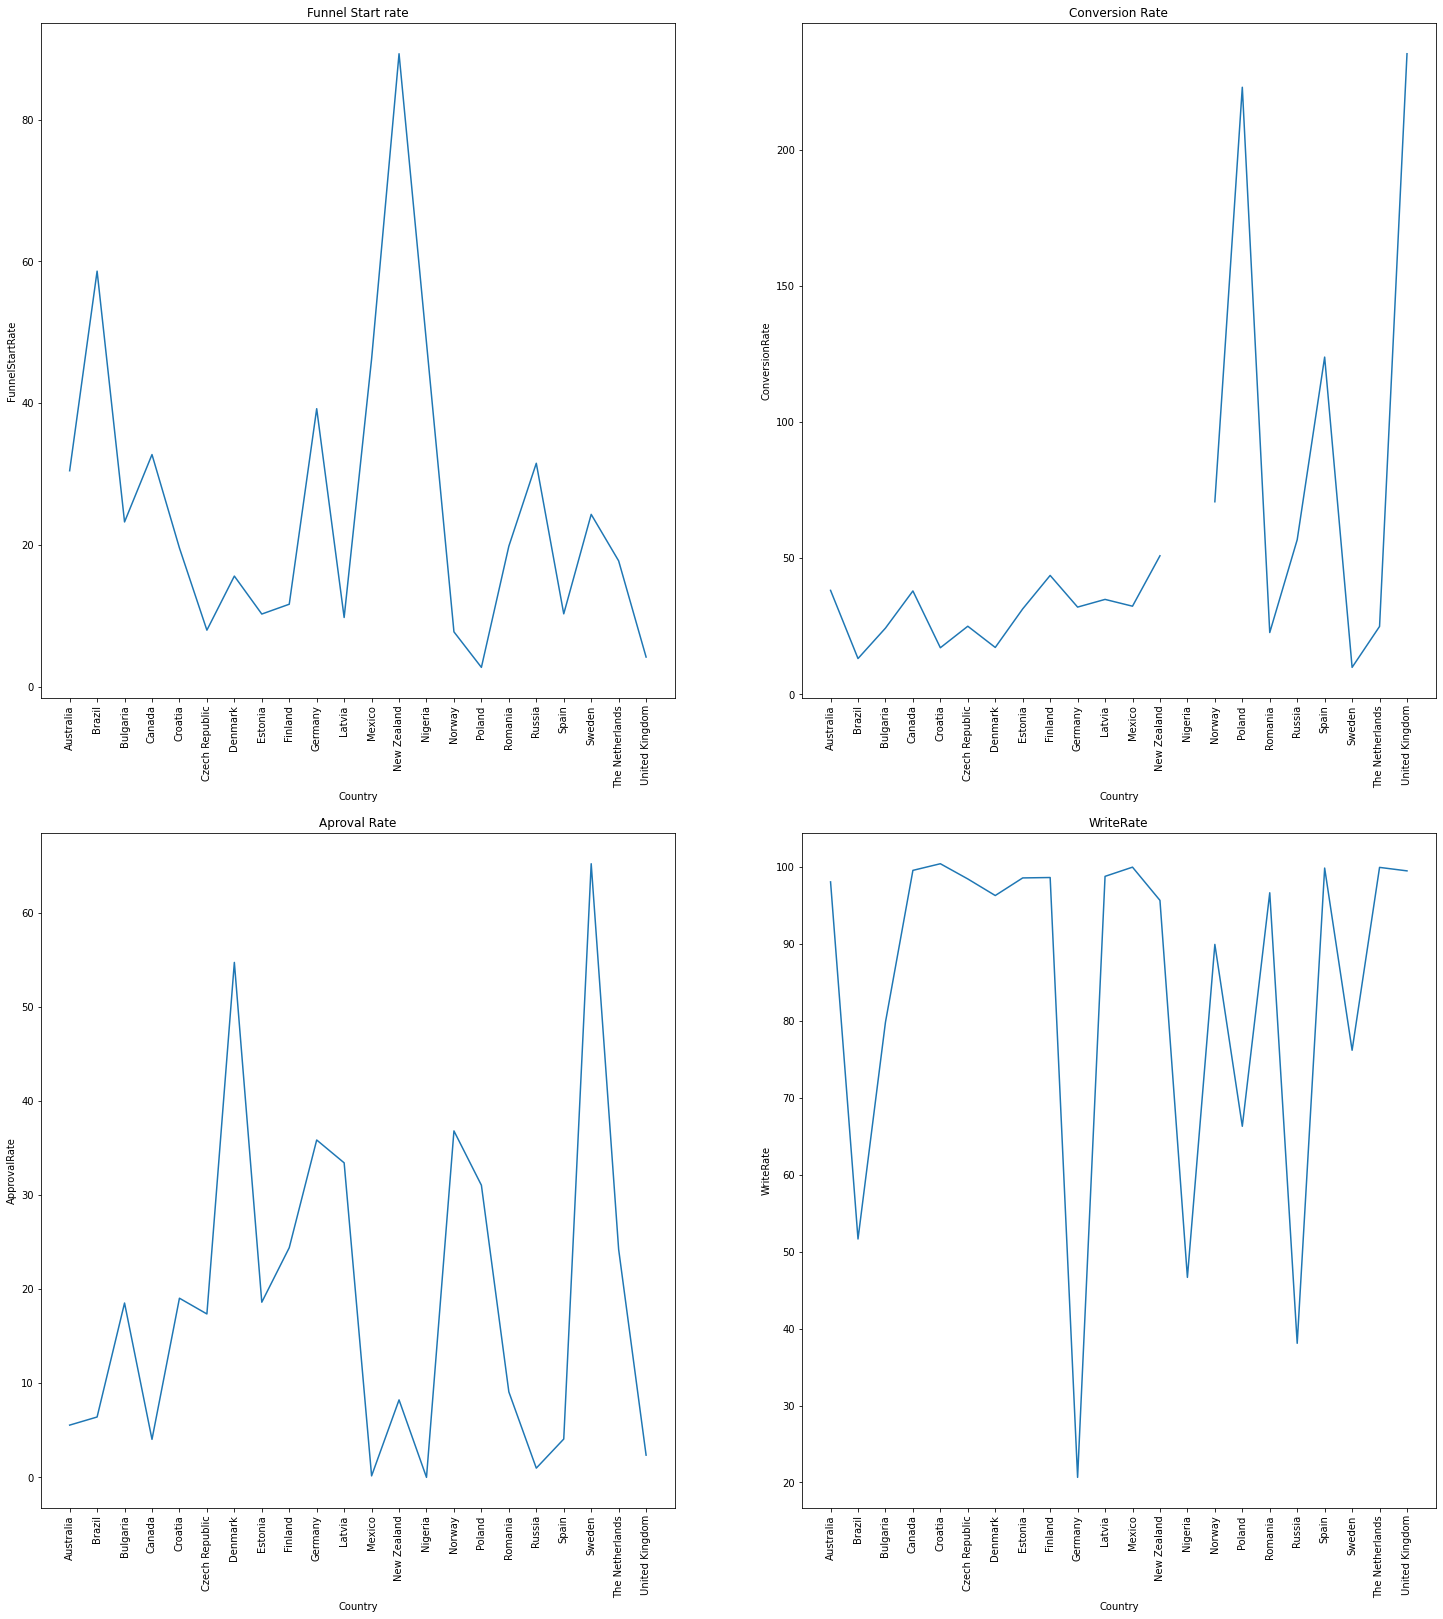

In [60]:
fig,([ax1,ax2],[ax3,ax4])= plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(25)

ax1.set_title('Funnel Start rate')
sns.lineplot(data= df_application_agg, x= 'Country', y='FunnelStartRate',ax=ax1 )
ax2.set_title('Conversion Rate')
sns.lineplot(data= df_application_agg, x= 'Country', y='ConversionRate',ax=ax2 )
ax3.set_title('Aproval Rate')
sns.lineplot(data= df_application_agg, x= 'Country', y='ApprovalRate',ax=ax3 )
ax4.set_title('WriteRate')
sns.lineplot(data= df_application_agg, x= 'Country', y='WriteRate',ax=ax4 )

plt.subplots_adjust(top=1.5)

for labels in ax1.get_xticklabels() + ax2.get_xticklabels() + ax3.get_xticklabels() + ax4.get_xticklabels():
  labels.set_rotation(90)
